<img src="https://www.nap.edu/openbook/21744/xhtml/images/img-231.jpg" >

This project aims to find the underlying buying patterns of the customers of an automobile part manufacturer based on the past 3 years of the Company's transaction data and hence recommend customized marketing strategies for different segments of customers.
<br />
Problem Statement:
<br />
An automobile parts manufacturing company has collected data of transactions for 3 years. They do not have any in-house data science team, thus they have hired you as their consultant. Your job is to use your magical data science skills to provide them with suitable insights about their data and their customers.

Data Dictionary:

ORDERNUMBER : Order Number
<br />
CUSTOMERNAME : customer
<br />
QUANTITYORDERED : Quantity ordered
<br />
PHONE : Phone of the customer
<br />
PRICEEACH : Price of Each item
<br />
ADDRESSLINE1 : Address of customer
<br />
ORDERLINENUMBER : order line
<br />
CITY : City of customer
<br />
SALES : Sales amount
<br />
POSTALCODE : Postal Code of customer
<br />
ORDERDATE : Order Date
<br />
COUNTRY : Country customer
<br />
DAYS_SINCE_LASTORDER : Days_ Since_Lastorder
<br />
CONTACTLASTNAME : Contact person customer
<br />
STATUS : Status of order like Shipped or not
<br />
CONTACTFIRSTNAME : Contact person customer
<br />
PRODUCTLINE : Product line – CATEGORY
<br />
DEALSIZE : Size of the deal based on Quantity and Item Price
<br />
MSRP : Manufacturer's Suggested Retail Price
<br />
PRODUCTCODE :Code of Product

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt

In [2]:
df = pd.read_excel("Sales_Data.xlsx")

In [3]:
df.shape

(2747, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,10259.761558,91.877521,10100.00,10181.000,10264.00,10334.500,10425.00
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
PRICEEACH,2747.0,101.098951,42.042548,26.88,68.745,95.55,127.100,252.87
ORDERLINENUMBER,2747.0,6.491081,4.230544,1.00,3.000,6.00,9.000,18.00
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00


In [6]:
duplicate = df[df.duplicated()]
  
print("Duplicate Rows :")

Duplicate Rows :


In [7]:
df["QUANTITYORDERED"].describe()

count    2747.000000
mean       35.103021
std         9.762135
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64

<Figure size 432x288 with 0 Axes>

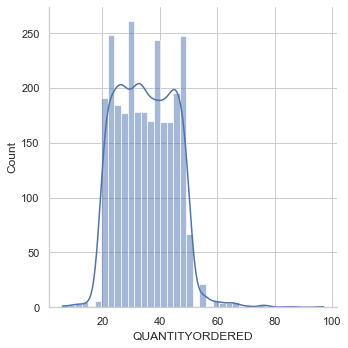

In [8]:
plt.figure()
sns.set(style = 'whitegrid')
sns.displot(data=df, x=df['QUANTITYORDERED'], kde=True)
plt.show()

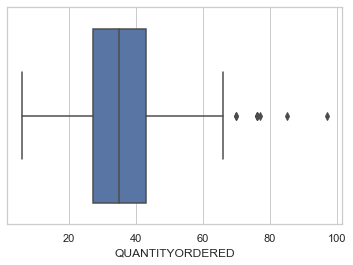

In [9]:
plt.figure()
sns.set(style = 'whitegrid')
ax = sns.boxplot(x=df['QUANTITYORDERED'])
plt.show()

In [10]:
df["PRICEEACH"].describe()

count    2747.000000
mean      101.098951
std        42.042548
min        26.880000
25%        68.745000
50%        95.550000
75%       127.100000
max       252.870000
Name: PRICEEACH, dtype: float64

<Figure size 432x288 with 0 Axes>

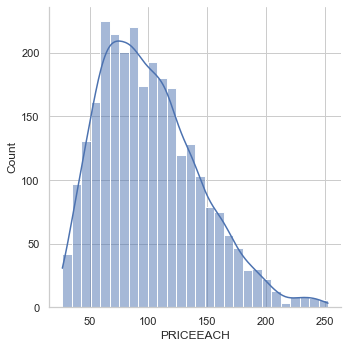

In [11]:
plt.figure()
sns.set(style = 'whitegrid')
sns.displot(data=df, x=df['PRICEEACH'], kde=True)
plt.show()

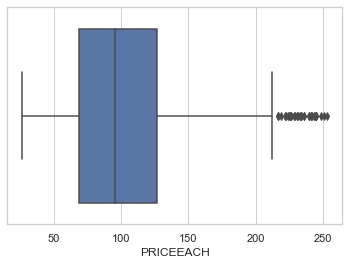

In [12]:
plt.figure()
sns.set(style = 'whitegrid')
ax = sns.boxplot(x=df['PRICEEACH'])
plt.show()

In [13]:
df.ORDERLINENUMBER.value_counts()

1     298
2     282
3     261
4     247
5     231
6     213
7     191
8     182
9     162
10    139
11    127
12    109
13     96
14     80
15     55
16     41
17     24
18      9
Name: ORDERLINENUMBER, dtype: int64

In [14]:
df["SALES"].describe()

count     2747.000000
mean      3553.047583
std       1838.953901
min        482.130000
25%       2204.350000
50%       3184.800000
75%       4503.095000
max      14082.800000
Name: SALES, dtype: float64

<Figure size 432x288 with 0 Axes>

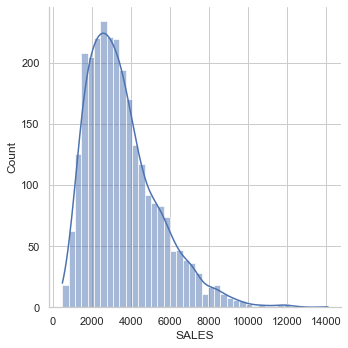

In [15]:
plt.figure()
sns.set(style = 'whitegrid')
sns.displot(data=df, x=df['SALES'], kde=True)
plt.show()

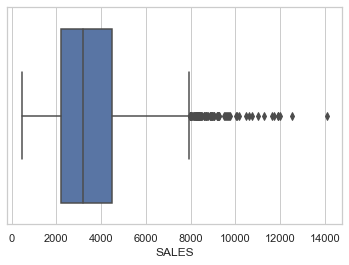

In [16]:
plt.figure()
sns.set(style = 'whitegrid')
ax = sns.boxplot(x=df['SALES'])
plt.show()

In [17]:
#df['date_col'] = df['ORDERDATE'].dt.to_period('M') 
df['year'] = df['ORDERDATE'].dt.year

<AxesSubplot:xlabel='year', ylabel='count'>

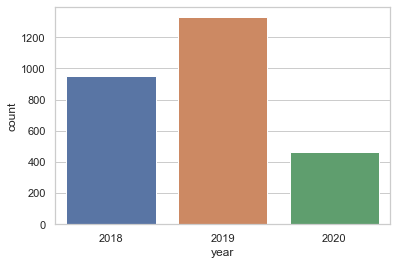

In [18]:
#ax = sns.barplot(x="year", y="count", data=df) #plot using seaborn
sns.countplot(x ='year', data = df)

In [19]:

df["DAYS_SINCE_LASTORDER"].describe()

count    2747.000000
mean     1757.085912
std       819.280576
min        42.000000
25%      1077.000000
50%      1761.000000
75%      2436.500000
max      3562.000000
Name: DAYS_SINCE_LASTORDER, dtype: float64

<Figure size 432x288 with 0 Axes>

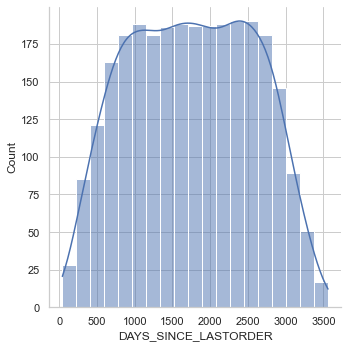

In [20]:
plt.figure()
sns.set(style = 'whitegrid')
sns.displot(data=df, x=df['DAYS_SINCE_LASTORDER'], kde=True)
plt.show()

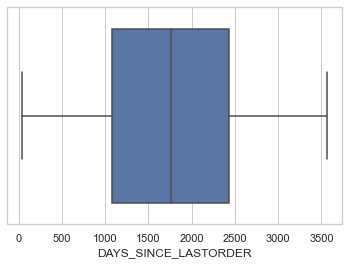

In [21]:
plt.figure()
sns.set(style = 'whitegrid')
ax = sns.boxplot(x=df['DAYS_SINCE_LASTORDER'])
plt.show()

In [22]:
df.STATUS.value_counts()

Shipped       2541
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

In [23]:
df.PRODUCTLINE.value_counts()

Classic Cars        949
Vintage Cars        579
Motorcycles         313
Planes              304
Trucks and Buses    295
Ships               230
Trains               77
Name: PRODUCTLINE, dtype: int64

In [24]:
#df.MSRP.value_counts()

df["MSRP"].describe()

count    2747.000000
mean      100.691664
std        40.114802
min        33.000000
25%        68.000000
50%        99.000000
75%       124.000000
max       214.000000
Name: MSRP, dtype: float64

<Figure size 432x288 with 0 Axes>

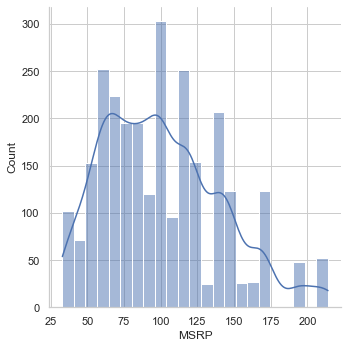

In [25]:
plt.figure()
sns.set(style = 'whitegrid')
sns.displot(data=df, x=df['MSRP'], kde=True)
plt.show()

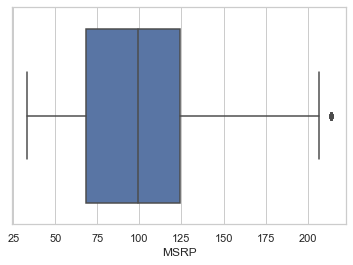

In [26]:
plt.figure()
sns.set(style = 'whitegrid')
ax = sns.boxplot(x=df['MSRP'])
plt.show()

In [27]:
df.PRODUCTCODE.value_counts()

S18_3232    51
S50_1392    28
S24_2840    28
S32_2509    28
S24_1444    28
            ..
S24_2887    22
S18_1749    21
S24_3969    21
S18_4409    21
S18_2248    21
Name: PRODUCTCODE, Length: 109, dtype: int64

In [28]:
df.CITY.value_counts()

Madrid        304
San Rafael    180
NYC           152
Singapore      79
Paris          70
             ... 
Sevilla        15
Graz           15
Munich         14
Burbank        13
Charleroi       8
Name: CITY, Length: 71, dtype: int64

In [29]:
df.COUNTRY.value_counts()

USA            928
Spain          342
France         314
Australia      185
UK             144
Italy          113
Finland         92
Norway          85
Singapore       79
Canada          70
Denmark         63
Germany         62
Sweden          57
Austria         55
Japan           52
Belgium         33
Switzerland     31
Philippines     26
Ireland         16
Name: COUNTRY, dtype: int64

In [30]:
df.DEALSIZE.value_counts()

Medium    1349
Small     1246
Large      152
Name: DEALSIZE, dtype: int64

In [31]:
df.CUSTOMERNAME.value_counts()

Euro Shopping Channel           259
Mini Gifts Distributors Ltd.    180
Australian Collectors, Co.       55
La Rochelle Gifts                53
AV Stores, Co.                   51
                               ... 
Microscale Inc.                  10
Royale Belge                      8
Auto-Moto Classics Inc.           8
Atelier graphique                 7
Boards & Toys Co.                 3
Name: CUSTOMERNAME, Length: 89, dtype: int64

In [32]:
 
df.ORDERDATE.value_counts()

2018-11-14    38
2019-11-24    35
2018-11-12    34
2019-11-17    32
2019-11-04    29
              ..
2019-04-20     1
2018-04-11     1
2020-03-02     1
2018-10-10     1
2019-08-28     1
Name: ORDERDATE, Length: 246, dtype: int64

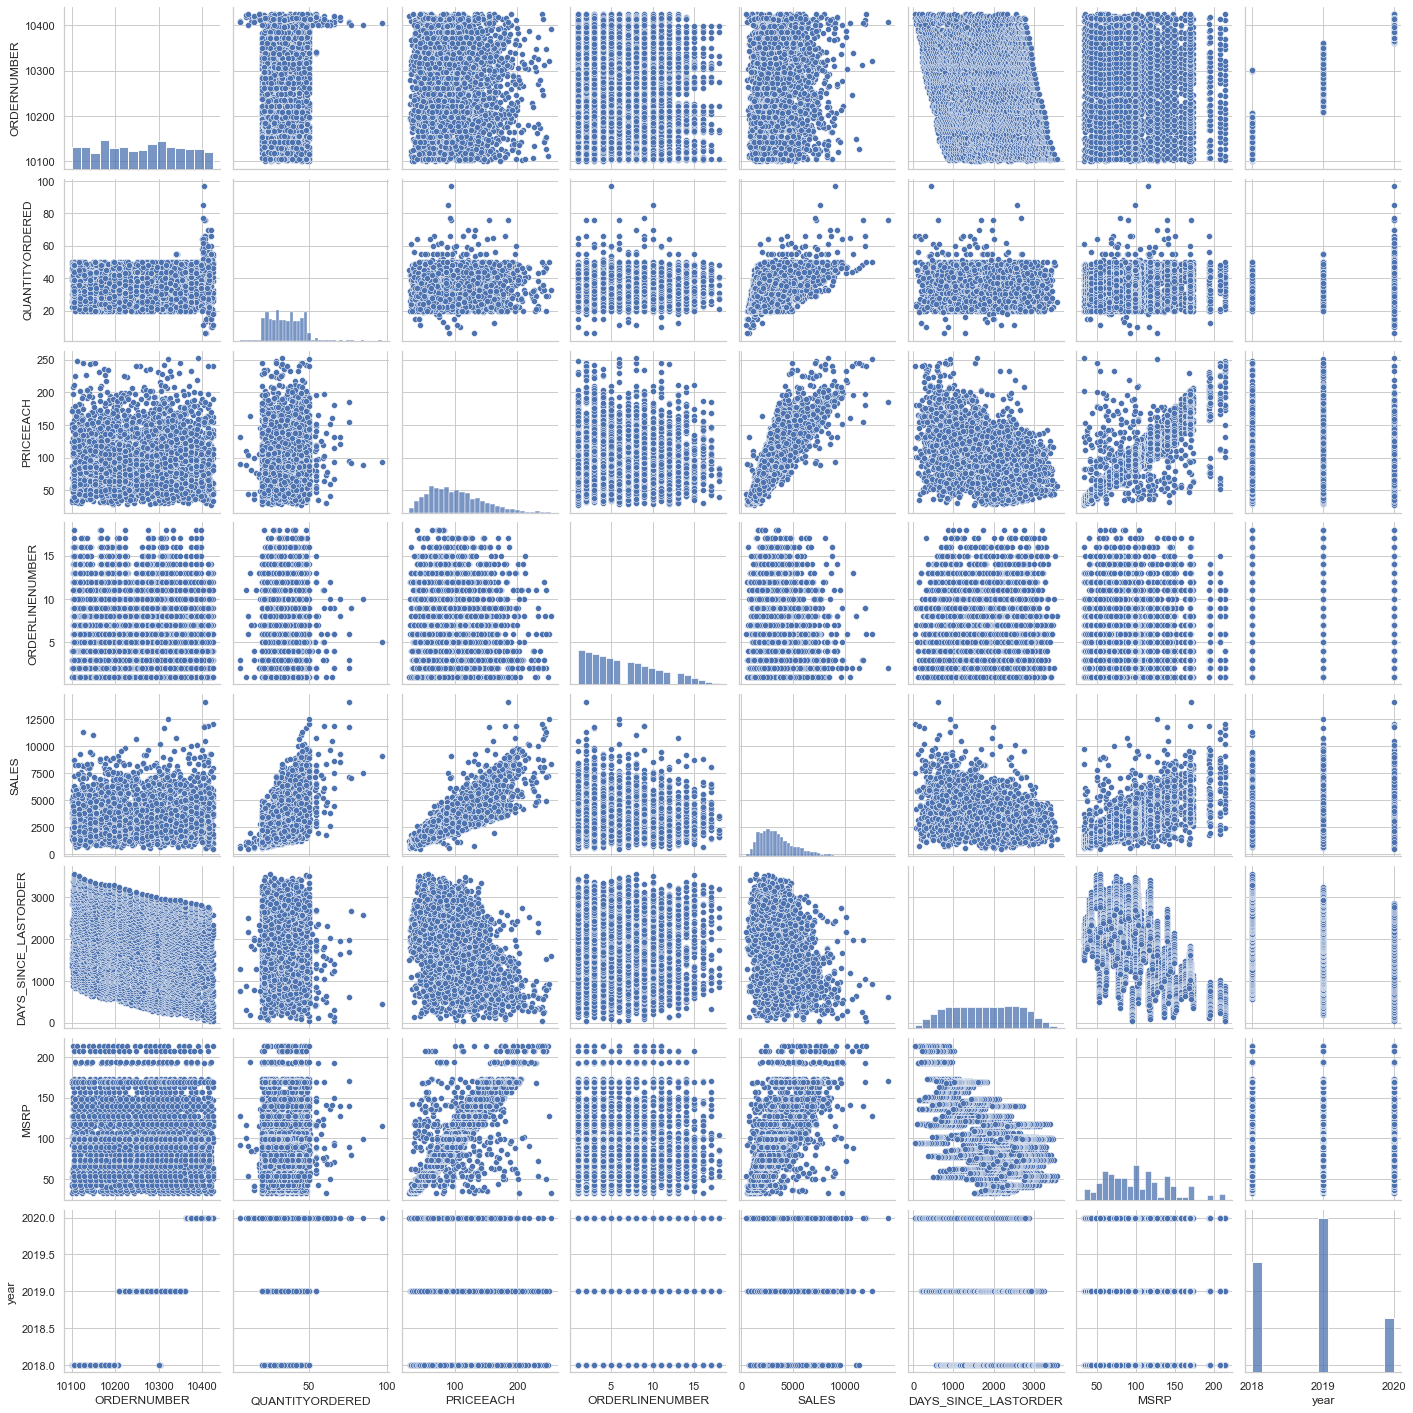

In [33]:
sns.pairplot(df)
plt.show()

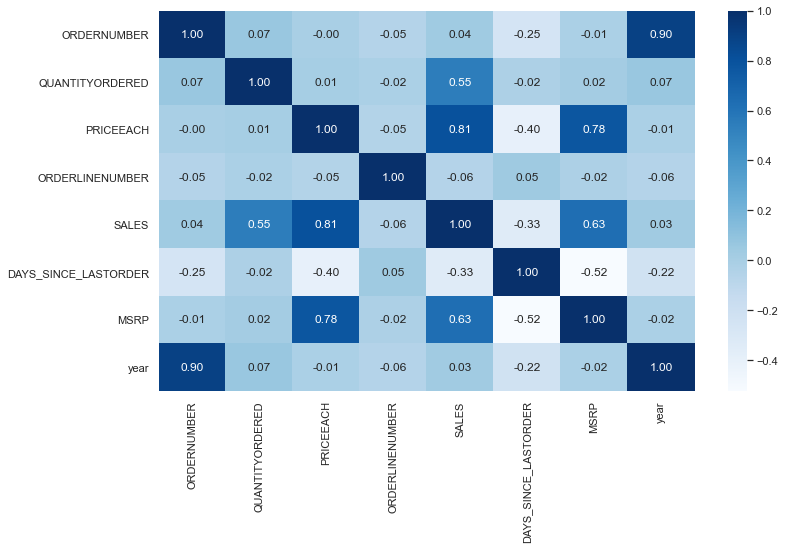

In [34]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()